In [1]:
#importing the packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## type your code here to create vpn dataframe
vpn_df= pd.read_csv("app_usage.csv")

In [4]:
#oberving the data
print(vpn_df.shape)

#look at the column names
print(vpn_df.columns)

#show the first 5 records
print(vpn_df.head(5))

(91, 11)
Index(['CRM', 'CloudDrive', 'ERP', 'Expenses', 'HR1', 'HR2', 'ITOps', 'OTHER',
       'Recruiting', 'Webmail', 'RemoteAccess'],
      dtype='object')
   CRM  CloudDrive  ERP  Expenses  HR1  HR2  ITOps  OTHER  Recruiting  \
0   49          99   17        38    0    0     18    144          33   
1  107         148   28        54    0    0     38    188          30   
2  639         796  221       216    0    0    133   1175         297   
3  653         767  203       191    0    0    139   1475         308   
4  670         738  196       140    0    0    128   1111         305   

   Webmail  RemoteAccess  
0      141           283  
1      213           430  
2      579           732  
3      549           738  
4      678           781  


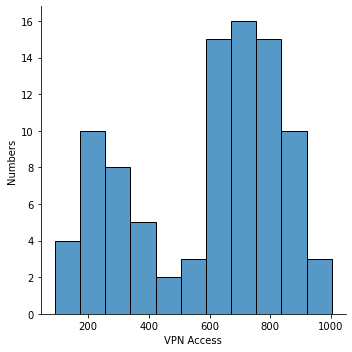

In [5]:
#Visualize data

#1. See the distribtuion of Remote VPN Access
y = vpn_df["RemoteAccess"]
ax = sns.displot(y, bins=11, kde=False)
ax.set(xlabel = "VPN Access", ylabel = "Numbers")

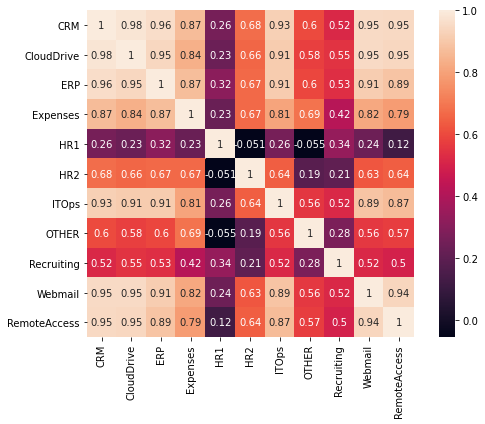

In [6]:
#2. See the correlation heat map

################################################################
## Create a correlation heatmap close to the display below  ####
## the answers may vary                                 ######## 

f, ax = plt.subplots(figsize=(8,6))
correlation_matrix = vpn_df.corr()
sns.heatmap(correlation_matrix, square=True, annot=True)
f.tight_layout()
#################################################################

In [7]:
#We determine that this is supervised machine learning problem
#Linear Regression can be a good model
from sklearn import linear_model

In [8]:
#The function takes X, y and retrun the trained model and R squared
def train_model(X,y):
    model = linear_model.LinearRegression()
    model.fit(X, y)
    R_2 = model.score(X,y)
    return model, R_2
#create a function to calculate Adjusted R_square
def cal_adjusted_R(R_2, p, n):
    R_adjusted = R_2-(1-R_2)*(p/(n-p-1))
    return R_adjusted

In [9]:
#The function takes X, y and retrun the trained model and R squared
def train_model(X,y):
    model = linear_model.LinearRegression()
    model.fit(X, y)
    R_2 = model.score(X,y)
    return model, R_2
#create a function to calculate Adjusted R_square
# n is the number of sample, p is the number features
def cal_adjusted_R(R_2, p, n):
    R_adjusted = R_2-(1-R_2)*(p/(n-p-1))
    return R_adjusted
#R_2_array stores the R squared of all the features
R_2_array = np.array([])
#Calcuate the R_squared 
for col_name in vpn_df.columns:
    if col_name == 'RemoteAccess':
        continue
    else:    
        ## call the train_model() function to calculate R squared   ####
        X_feature = vpn_df[[col_name]]
        target = vpn_df[['RemoteAccess']]
        model, R_2 = train_model(X_feature, target)
        print(col_name, R_2)       
        R_2_array =  np.append(R_2_array, R_2)     
sorted_R_2_index = np.argsort(R_2_array)[::-1]       
#print out the sorted indexes 
print("The order of index numbers are : \t", sorted_R_2_index)

CRM 0.9030603942302714
CloudDrive 0.8932567722424455
ERP 0.7904301126742891
Expenses 0.6232665636003503
HR1 0.015308027253735923
HR2 0.4142858559100606
ITOps 0.7566204951691912
OTHER 0.3268756160241405
Recruiting 0.24953322751414386
Webmail 0.8847819743305698
The order of index numbers are : 	 [0 1 9 2 6 3 5 7 8 4]


In [10]:
#gradually build up our model and add R squared and adjusted R to the output
for i in range(len(sorted_R_2_index)):
    #the selected_features should be the top i most associated features
    selected_features = []
    #take the top 1 to ith features as X
    for j in range(i+1):
            #append a new column based on the sorted R value
            #take your time to digist this line
            selected_features.append(vpn_df.columns[sorted_R_2_index[j]])         
    #verify we got the right features
    print(selected_features)
    X_feature = vpn_df[selected_features]
    target = vpn_df[['RemoteAccess']] 
    # train the model
    model, R_2 = train_model(X_feature, target) 
    #calculate adjusted R
    R_adjusted = cal_adjusted_R(R_2, i+1, vpn_df.shape[0]) 
    #print the output
    print("R2: ", R_2, "\t Ajusted R2: ", R_adjusted, "\n")

['CRM']
R2:  0.9030603942302714 	 Ajusted R2:  0.901971185176679 

['CRM', 'CloudDrive']
R2:  0.9074773125587101 	 Ajusted R2:  0.9053745242077718 

['CRM', 'CloudDrive', 'Webmail']
R2:  0.91697207235234 	 Ajusted R2:  0.9141090403644897 

['CRM', 'CloudDrive', 'Webmail', 'ERP']
R2:  0.924310482006334 	 Ajusted R2:  0.9207900393089542 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps']
R2:  0.9245040709947892 	 Ajusted R2:  0.9200631339944826 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses']
R2:  0.9261180813990765 	 Ajusted R2:  0.9208408014990105 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2']
R2:  0.9268374090661093 	 Ajusted R2:  0.9206670700716848 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2', 'OTHER']
R2:  0.9303318238786105 	 Ajusted R2:  0.9235349286472554 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2', 'OTHER', 'Recruiting']
R2:  0.9305073579887443 	 Ajusted R2:  0.922785953320827 

['CRM', 'CloudDr

In [11]:
#let's build the model with all the features

y = vpn_df['RemoteAccess']
X = vpn_df.drop('RemoteAccess', 1)

from sklearn import linear_model

#create a linear regression model from linear_model package 
model=linear_model.LinearRegression()

#Train the model with our data (X, y)
model.fit(X,y)

#Display the parameters
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)
#use R squared to see how much variation is explained by the trained model
print('R_squared: \n', model.score(X,y))

Intercept: 
 168.7686827349812
Coefficients: 
 [ 0.78030166  0.02552479 -0.3614915  -0.22380617 -0.14305536 -0.02601244
 -0.14498212 -0.01503002  0.02986555  0.32726658]
R_squared: 
 0.9392847759700534


In [12]:
# Should we reduce the number of features? 
from IPython.display import IFrame
IFrame('http://abbottanalytics.blogspot.com/2004/12/find-correlated-variables-prior-to.html', width=1200, height=300)

In [14]:
# Find variance of individual columns in dataframe
vpn_df.drop(["CRM", "ITOps", "Recruiting", "CloudDrive", "HR2", "RemoteAccess"], 1).var().sort_values()

Expenses      8369.025397
ERP           8784.632234
HR1          57291.004884
Webmail      57887.074725
OTHER       131016.658852
dtype: float64

In [21]:
# all the features that have correlation higher than 0.9 to it. 
##################################################################################
## modify the following code to remove the features you feel necessary
X = vpn_df.drop(["HR2", "ITOps", "RemoteAccess","OTHER", "Recruiting", "CloudDrive", "ERP", "Expenses"], 1)
print(X.columns)
from sklearn.linear_model import Lasso

best_score = 0
best_alpha = 0 
# let's fine tune alpha to find the model we need 
for alpha in np.linspace(1, 0.2, 1000):
    
    # create a linear regression (Lasso) model from linear_model package 
    model = Lasso(alpha=alpha, normalize=True, max_iter=1e5)

    # Train the model with our data (X, y)
    model.fit(X,y)

    # Find a model that uses exactly 3 features.
    # Output the score of this model (R squared) and corresponding alpha value.
    score = model.score(X, y)
    
    if score > best_score:
        best_score = score
        best_alpha = alpha

print("The best R of my 3-feature model is:\t\t", best_score)
print("The alpha I used in Lasso to find my model is: \t", best_alpha)

#use R squared to see how much variation is explained by the trained model
print('R_squared: \n', best_score)

Index(['CRM', 'HR1', 'Webmail'], dtype='object')
The best R of my 3-feature model is:		 0.9319454654737581
The alpha I used in Lasso to find my model is: 	 0.2
R_squared: 
 0.9319454654737581


In [32]:
##### Write your summary here
print("My summary:\nThe best R of my feature model is: 0.9319454654737581")
print("the 3 features in my model are: 'CRM', 'HR1', 'Webmail'")

My summary:
The best R of my feature model is: 0.9319454654737581
the 3 features in my model are: 'CRM', 'HR1', 'Webmail'


In [33]:
print("Summary:\nI dropped two of the ITOps, CloudDrive, and HR2 columns because their correlation with the target column, RemoteAccess, was greater than 0.9.\nWhen I added these columns, I remove the 'ITOps,' RemoteAccess' and the 'Recruitment' columns directly. and \nI sorted them by variance and chose by keeping the column with the highest variance (OTHERS) as a feature, while removing the rest.")

Summary:
I dropped two of the ITOps, CloudDrive, and HR2 columns because their correlation with the target column, RemoteAccess, was greater than 0.9.
When I added these columns, I remove the 'ITOps,' RemoteAccess' and the 'Recruitment' columns directly. and 
I sorted them by variance and chose by keeping the column with the highest variance (OTHERS) as a feature, while removing the rest.
